<a href="https://colab.research.google.com/github/sufawan20/Bike-Sharing-Demand-Prediction-Regression-project/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
Contribution - Team

**Team Member 1** - Tousif Sheikh

**Team Member 2** - Mohammad Sufawan

**Team Member 3** - Udit kumar


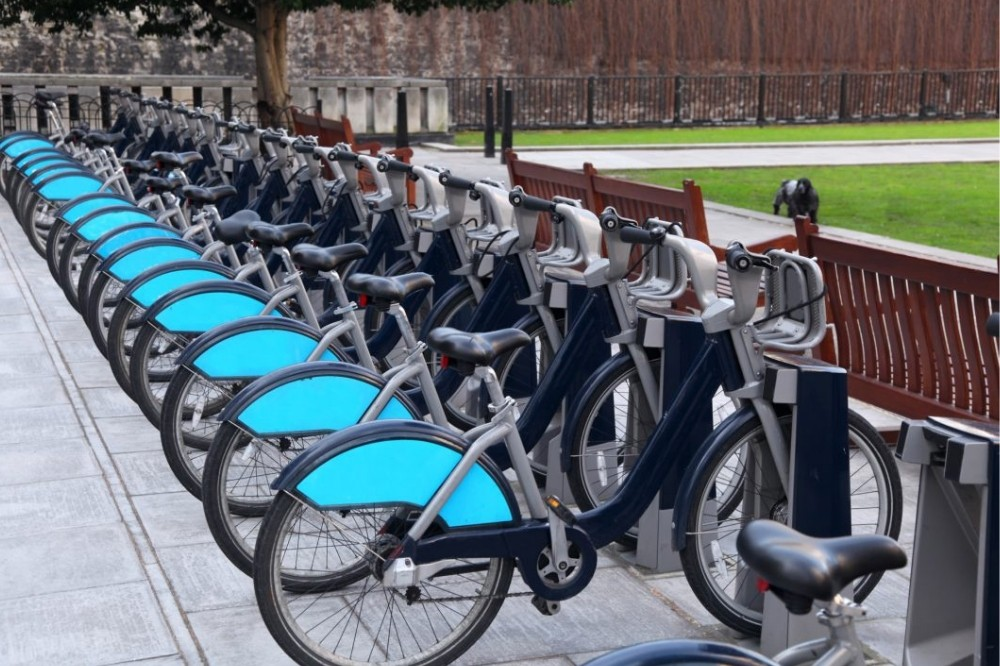

# **GitHub Link -**

Tousif Sheikh- https://github.com/tousif99/Bike_Sharing_Demand_Prediction/tree/main

Mohammad Sufawan-

# **Project Summary -**

This project aims to enhance the mobility and convenience of the public through bike-sharing programs in metropolitan areas. One of the main challenges is maintaining a consistent supply of bikes for rental. Bike-sharing systems are automated and enable people to rent and return bikes at various locations. The project focuses on utilizing historical data on factors such as temperature and time to predict the demand for the bike-sharing program in Seoul.

* There were approximately 8760 records and 14 attributes in the dataset.
* We started by importing the dataset, and necessary libraries and conducted exploratory data analysis (EDA).
* Outliers and null values were removed from the raw data and treated. Data were transformed to ensure that it was compatible with machine learning models.
* We handled target class imbalance using square root normalization.
* Then finally cleaned and scaled data was sent to 11 various models, the metrics were made to evaluate the model, and we tuned the hyperparameters to make sure the right parameters were being passed to the model.
* When developing a machine learning model, it is generally recommended to track multiple metrics because each one highlights distinct aspects of model performance. We are, focusing more on the R2 score and RMSE score.
*  The R2 score is scale-independent, which means that it can be used to compare models that are fit to different target variables or to target variables that have different units of measurement. This is particularly useful when comparing models for different problems, as it allows for a direct comparison of the performance of the models, regardless of the scale of the target variable

# **Index**

1.   Problem Statement
2.   Know Your Data
3.   Understanding Your Variables
4.   EDA
5.   Data Cleaning
6.   Feature Engineering
7.   Model Building
8.   Model Implementaion.
9.   Conclusion

# **Let's Begin !**

## **1. Problem Statement**

Many metropolitan areas now offer bike rentals to improve mobility and convenience. Ensuring timely access to rental bikes is critical to reducing wait times for the public, making a consistent supply of rental bikes a major concern. The expected hourly bicycle count is particularly crucial in this regard.

Bike sharing systems automate membership, rentals, and bike returns through a network of locations. Individuals can rent bikes from one location and return them to another or the same location, as needed. Membership or request facilitates bike rentals, and the process is overseen by a citywide network of automated stores.

This dataset aims to predict the demand for Seoul's Bike Sharing Program based on historical usage patterns, including temperature, time, and other data.

### **Business Context**

Estimating the number of required bikes at any given time and day is a critical business concern. Having fewer bikes results in resource wastage (in terms of bike maintenance and the land/bike stand required for parking and security), while having more bikes can lead to revenue loss, ranging from immediate loss due to a lower number of customers to potential long-term loss due to a loss of future customers. Therefore, it is essential for bike rental businesses to have an estimate of demand to function effectively.

## **2. Know Your Data**

### Import Libraries

In [ ]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to import datetime library
from datetime import datetime
import datetime as dt

# libraries used to pre-process
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# libraries used to implement models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# libraries to evaluate performance
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

# to set max column display
pd.pandas.set_option('display.max_columns',None)

### Dataset Loading

In [ ]:
# let's mount the google drive first
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load the Seol bike data set from the drive
bike_df = pd.read_csv('/content/SeoulBikeData.csv',encoding ='latin')

### Dataset First View

In [ ]:
# Viewing the top 5 rows to take a glimpse of the data
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns Count

In [ ]:
# Dataset Rows & Columns
bike_df.shape

(8760, 14)

In [ ]:
print(f'number of rows : {bike_df.shape[0]}  \nnumber of columns : {bike_df.shape[1]}')

number of rows : 8760  
number of columns : 14


### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We have 14 columns. most of them are numerical except Seasons, Holiday, Functioning Days, and Date

We have to convert the Date column into the DateTime datatype.

### Duplicate Values

**How important is it to get rid of duplicate records in my data?**

When there are identical instances in a dataset, it is referred to as "duplication." Such duplication could occur due to erroneous data entry or data collection procedures. Eliminating duplicate data from the dataset saves time and money by avoiding the repetition of the same data sent to the machine learning model.

In [ ]:
# Dataset Duplicate Value Count
# Checking Duplicate Values
value = len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


We found that there is no duplicate entry in the above data.

### Missing Values/Null Values

**Why dealing with missing values is necessary?**

Real-world data often contains numerous missing values, which can be due to data corruption or other factors. As many machine-learning algorithms do not support missing values, it is necessary to handle them during the dataset pre-processing stage. Thus, the first step in dealing with missing data is to identify the missing values.

In [ ]:
# Missing Values/Null Values Count
print(bike_df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


<Axes: >

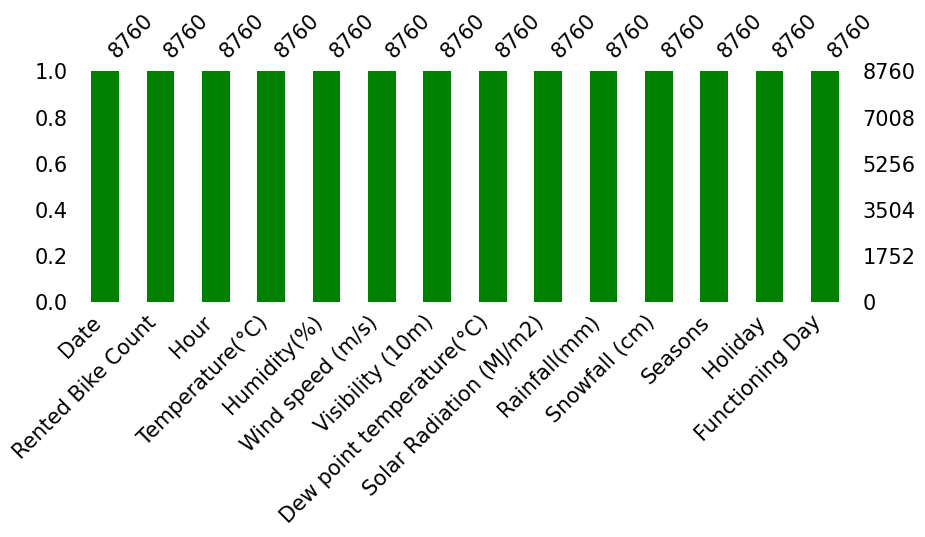

In [ ]:
# Visualizing the missing values
import missingno as msno
msno.bar(bike_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

<Axes: >

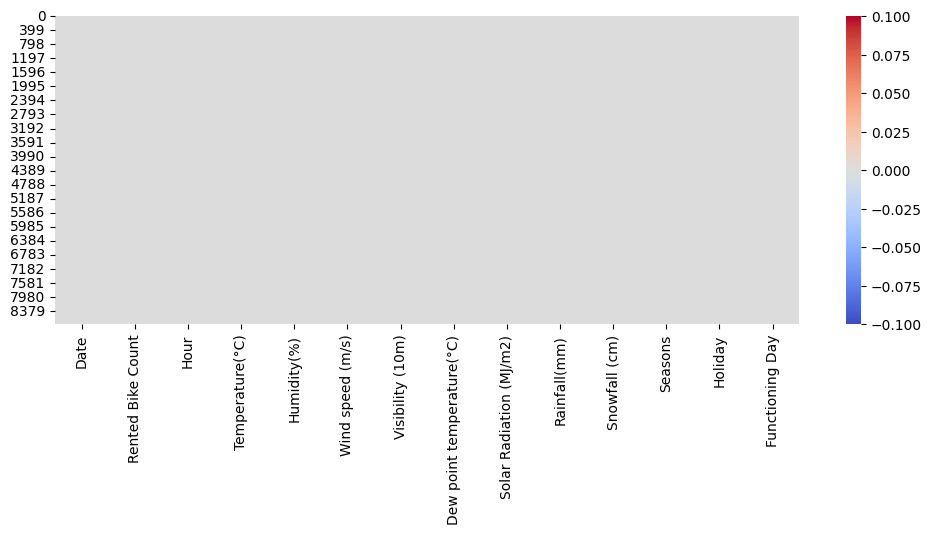

In [ ]:
# Visualizing the missing values using Heatmap
plt.figure(figsize=(12,4))
sns.heatmap(bike_df.isna(), cmap = 'coolwarm')

From the above command, we noticed that every column has 0 null values. This seems to be clean data and there is no missing data in any of the rows and columns.

### What did you know about your dataset?